## Exercice 9.3

Modélisation de radioactivité du Polonium 210

In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
input_df = pandas.read_csv("Polonium210.csv",sep=";")

In [3]:
input_df

,Temps (jours),Poportion de Polonium (%)
0,0,100
1,40,82
2,80,67
3,120,55
4,160,45
5,200,37
6,240,30


In [4]:
input_df.rename(columns={'Temps (jours)':'Temps','Poportion de Polonium (%)':'Proportion'}, inplace=True)

In [5]:
input_df

,Temps,Proportion
0,0,100
1,40,82
2,80,67
3,120,55
4,160,45
5,200,37
6,240,30


Représentation graphique des données brutes:

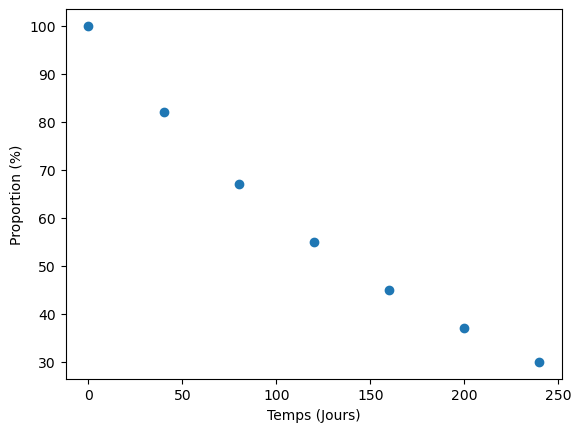

In [6]:
plt.plot(input_df['Temps'],input_df['Proportion'],'o')
plt.xlabel('Temps (Jours)')
plt.ylabel('Proportion (%)')
plt.show()

In [7]:
input_df['ln Proportion'] = np.log(input_df['Proportion'])

In [8]:
input_df

,Temps,Proportion,ln Proportion
0,0,100,4.605170
1,40,82,4.406719
2,80,67,4.204693
3,120,55,4.007333
4,160,45,3.806662
5,200,37,3.610918
6,240,30,3.401197


In [9]:
input_df[['Temps','ln Proportion']].cov()

,Temps,ln Proportion
Temps,7466.666667,-37.343675
ln Proportion,-37.343675,0.186779


In [10]:
A = input_df.cov()['Temps']['ln Proportion']/input_df.cov()['Temps']['Temps']
A

-0.005001385010570101

In [11]:
B = input_df['ln Proportion'].mean() - A * input_df['Temps'].mean()
B

4.606265204404481

In [12]:
input_df['Modele ln Proportion vs Temps'] = A * input_df['Temps'] + B

In [13]:
input_df['Modele Proportion vs Temps'] = np.exp(input_df['Modele ln Proportion vs Temps'])

In [14]:
input_df

,Temps,Proportion,ln Proportion,Modele ln Proportion vs Temps,Modele Proportion vs Temps
0,0,100,4.605170,4.606265,100.109562
1,40,82,4.406719,4.406210,81.958236
2,80,67,4.204693,4.206154,67.098011
3,120,55,4.007333,4.006099,54.932162
4,160,45,3.806662,3.806044,44.972159
5,200,37,3.610918,3.605988,36.818050
6,240,30,3.401197,3.405933,30.142400


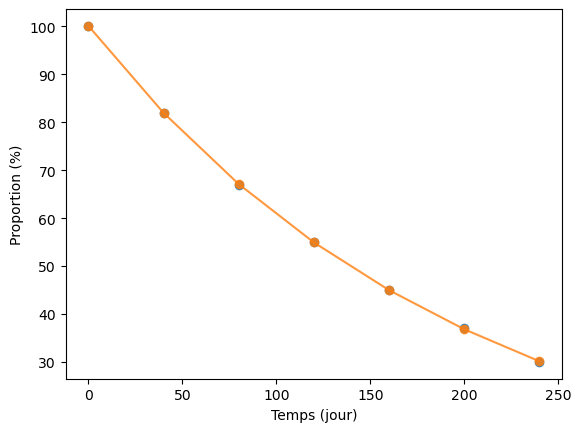

In [15]:
plt.plot(input_df['Temps'],input_df['Proportion'],'o',alpha=0.8)
plt.plot(input_df['Temps'],input_df['Modele Proportion vs Temps'],'-o',alpha=0.8)
plt.ylabel('Proportion (%)')
plt.xlabel('Temps (jour)')
plt.show()

Modèle plutôt pas mal par rapport aux données expérimentales!

Par contre, la question qui tue (souvenez-vous du live...) "Donnez une estimation du paramètre lambda (demi-vie)".

L'estimation ne doit pas être fonction de la vitesse du vent ou de l'âge du capitaine mais bien de ce que nous avons déjà calculé
jusque là, soit A et B.

In [19]:
temps_demi_vie = -math.log(2)*1/A
temps_demi_vie

138.5910460992353

Comment pouvons-nous calculer directement les valeurs de poportion en fonction du temps?
Appliquons directement les formules du modèle en remplaçant -lambda par A (cfr Slide 95).

On obtient alors, sur un intervalle de jours allant jusque 500:

In [22]:
interpolate_df = pandas.DataFrame()
interpolate_df['Temps'] = np.linspace(0, 500)
interpolate_df['Proportion (%)'] = interpolate_df.apply(lambda r:100*math.exp(A*r['Temps']), axis=1)

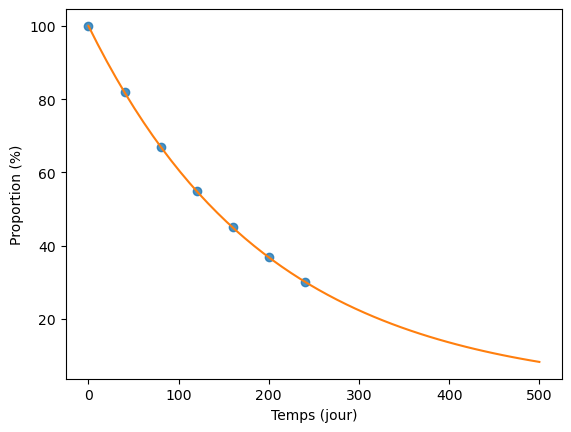

In [23]:
plt.plot(input_df['Temps'],input_df['Proportion'],'o',alpha=0.8)
plt.plot(interpolate_df['Temps'], interpolate_df['Proportion (%)'])
plt.ylabel('Proportion (%)')
plt.xlabel('Temps (jour)')
plt.show()